## RNN
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs.

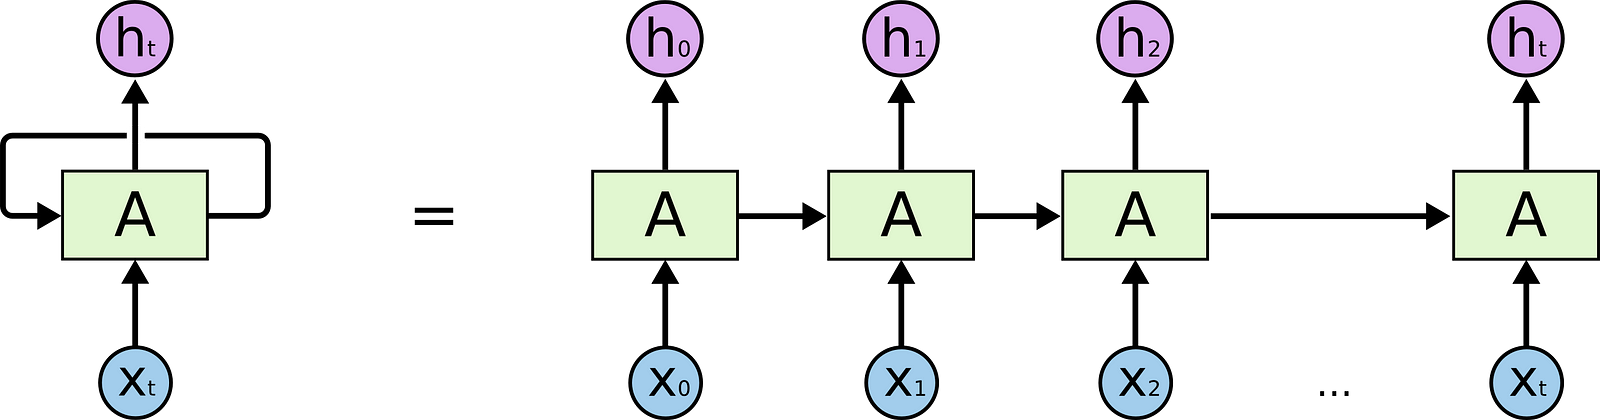

Use LSTMs for predicting the price of stocks of IBM for the year 2017

In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error



In [53]:
# Some functions to help out
def plot_predictions(test, predicted):
  plt.plot(test, color='red', label='Real IBM Stock Price')
  plt.plot(predicted, color='blue', label= 'Predicted IBM Stock Price')
  plt.title('IBM Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('IBM Stock Price')
  plt.legend()
  plt.show()

def return_rmse(test, predicted):
    rmse= math.sqrt(mean_squared_error(test, predicted))
    print('The root mean squared error is {}'.format(rmse))

In [39]:
# getting the data
dataset= pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col= 'Date', parse_dates= ['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN).
The cell is responsible for "remembering" values over arbitrary time intervals, as in a multi-layer (or feedforward) neural network.

In [40]:
# checking for missing values
training_set= dataset[:'2016'].iloc[:, 1:2].values
test_set= dataset['2017':].iloc[:, 1:2].values


In [41]:
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [167.74],
       [166.99],
       [166.7 ]])

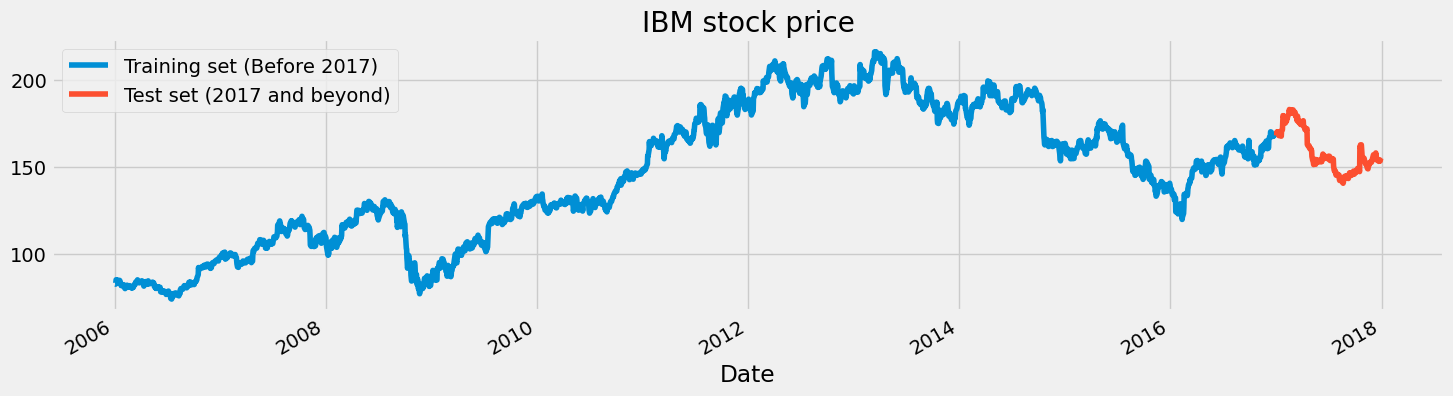

In [42]:
# we have chosen 'High' attribute for the price. Let's see what it looks like.
dataset['High'][:'2016'].plot(figsize=(16,4), legend=True)
dataset['High']['2017':].plot(figsize=(16,4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [43]:
# scaling the training set
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)

In [44]:
# since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# so for each element of training set, we have 60 previous training set elements.
X_train= []
y_train= []

for i in range(60, 2769):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train= np.array(X_train), np.array(y_train)

In [45]:
# reshaping X_train for efficient modelling
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
# the LSTM architecture
regressor= Sequential()

# first LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# forth LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fititng to the training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - loss: 0.1244
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - loss: 0.0788
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 0.0802
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 0.0773
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - loss: 0.0762
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0777
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0752
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 0.0749
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 0.0749
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - loss: 0.0750
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - loss: 0.0726
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 0.0751
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0746
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - loss: 0.0727
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [77]:
# Now, to get the test set ready in a similar way as the training set
# the following has been done for 60 entries of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing

dataset_total= pd.concat((dataset["High"][:"2016"], dataset["High"]["2017":]), axis=0)
inputs = dataset_total[-(len(test_set) + 60):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [78]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60, 60 + len(test_set)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


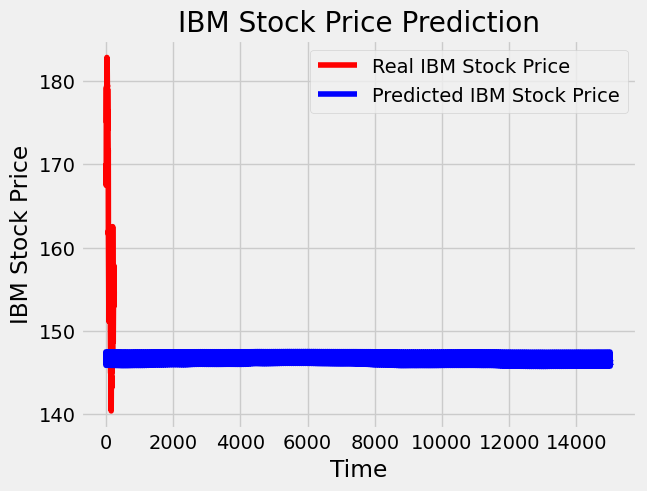

In [79]:
# visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)

In [ ]:
# evaluating our model
return_rmse(test_set, predicted_stock_price)

## Gated Recurrent Units
the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit.It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

In [84]:
# the GRU achitecture
regressorGRU= Sequential()
# first GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 305ms/step - loss: 0.1792
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 376ms/step - loss: 0.0502
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 467ms/step - loss: 0.0207
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 628ms/step - loss: 0.0055
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 514ms/step - loss: 0.0047
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - loss: 0.0040
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - loss: 0.0038
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 433ms/step - loss: 0.0036
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 384ms/step - loss: 0.0036
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - loss: 0.0033
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - loss: 0.0034
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - loss: 0.0034
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - loss: 0.0031
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - loss: 0.0031
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/st

In [87]:
# preparing X_test and predicting the prices
X_test= []
for i in range(60, 311):
  X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price= regressorGRU.predict(X_test)
GRU_predicted_stock_price= sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


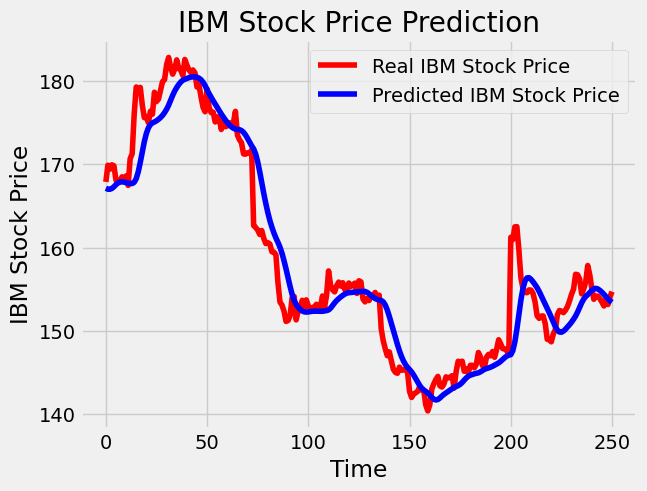

In [88]:
# visualizing the results for GRU
plot_predictions(test_set, GRU_predicted_stock_price)


In [89]:
# evaluating GRU
return_rmse(test_set, GRU_predicted_stock_price)

The root mean squared error is 3.3247671472345415
